# COGS 108 - Final Project
# Alcohol Consumption and University Reputation

# Overview

*Alcohol has a major impact on American universities, despite laws that set the minimum drinking age to 21 and mandate universities to implement regulations on students to prevent excessive drinking. We are curious about whether this is in the case for foreign countries as well, in which the minimum drinking age is set lower than America. Our project focused on investigating whether there was a correlation between the amount of alcohol a country consumes and the average scores of its universities, weighted on quality of education, alumni employment, quality of faculty, and research performance. We performed a linear regression analysis and discovered that there is a positive correlation between a country's average alcohol consumption and the average scores of its universities.*

# Names

- Pui Ting Wong
- Evan Eguchi
- Justin Yu
- Steven Schaeffer

<a id='research_question'></a>
# Research Question

*How does the rate of alcohol consumption among citizens within a country predict the reputation of that country's universities?*

<a id='background'></a>

## Background & Prior Work

In the article "University drinking culture is dangerous, not amusing", the author discusses the drinking culture at the University of Maine. This is a reflection of American college drinking culture. The article mentioned that even though most undergraduates are younger than 21, below the legal drinking age, a strong drinking culture is still prevalent on campus. This article led us to think about college drinking culture. In the article "Is Japan's after-work drinking culture a thing of the past?", the author describes the drinking culture in Japan, where drinking is considered an essential part of socializing. This article led us to think about the drinking culture of different countries. Many countries have slightly different drinking cultures and drink for different purposes. Differences among cultures affect the volume of alcohol people consume from these different countries. In the article "Years of education may impact drinking behavior and risk of alcohol dependence", the author shows that as a person receives additional education they have a lower risk of alcohol dependence, stating that students "with an additional 3.61 years of schooling were associated with an approximately 50% reduced risk of alcohol dependence". This led us to think about if higher quality education in a country would further reduce the drinking rate. Combining the reflections we have for these three articles, we want to know how the average education quality of a country could reflect the alcohol consumption of the people.


References (include links):
- 1)"University drinking culture is dangerous, not amusing" Maine Campus April 2020

https://mainecampus.com/2020/04/12640/

- 2)"Is Japan's after-work drinking culture a thing of the past?" dw.com October 2019

https://www.dw.com/en/is-japans-after-work-drinking-culture-a-thing-of-the-past/a-50720989

- 3)"Years of education may impact drinking behavior and risk of alcohol dependence" October 2019

https://www.sciencedaily.com/releases/2019/10/191025075838.htm

# Hypothesis


The higher education quality of a country should be negatively correlated with alcohol consumption.

Studies reflect that people who received higher education will have a lower risk of alcohol dependence. If people in a country have more opportunities to receive better education, they should be less likely to drink. The reason behind this is that when people receive higher education, they have more opportunities, and it is easier to make a living so they should be less stressed about life and less likely to drink due to stress. When a country has higher average education quality, this should also imply that the country is more developed with more opportunities and has better welfare for the people. Since alcohol consumption is often due to stress, people from these countries should also be less likely to drink.

# Dataset(s)

Dataset #1: Alcohol Consumption around the World
- Link to the dataset: https://www.kaggle.com/codebreaker619/alcohol-comsumption-around-the-world
- Number of observations: 965
- *Alcohol Consumption: Average alcohol consumption (by type of alcohol) between different regions in the world.*

Dataset #2: CWUR University Rankings 2019-20
- https://www.kaggle.com/mdelrosa/cwur-university-rankings-201920
- Number of observations: 16,000
- *CWUR University Rankings: Academic rankings between universities on a global scale.*

We plan to merge the two datasets on the Locations of the two datasets, and specifically taking into account the rankings and scores of universities and their average alcohol consumptions.

# Setup

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Data Cleaning

In [2]:
uni_df = pd.read_csv('data/cwur_2019.csv')
uni_df = uni_df[['world_rank', 'institution', 'location', 'education_quality',
                 'alumni_employment', 'faculty_quality', 'research_performance', 'score']]

alc_df = pd.read_csv('data/drinks.csv')

In [3]:
## Clean new dataframes
uni_df = uni_df.rename({'world_rank' : 'rank'}, axis='columns')

alc_df = alc_df.rename({'country' : 'location', 'total_litres_of_pure_alcohol' : 'litres_alcohol'}, axis='columns')
alc_df = alc_df.replace({'Russian Federation' : 'Russia', 'Slovakia' : 'Slovak Republic',
                         'Macedonia' : 'North Macedonia', 'DR Congo' : 'Democratic Republic of the Congo'})

for location in uni_df.location:
    if location not in alc_df.location.unique():
        uni_df.drop(uni_df.loc[uni_df['location'] == location].index, inplace=True)

for location in alc_df.location:
    if location not in uni_df.location.unique():
        alc_df.drop(alc_df.loc[alc_df['location'] == location].index, inplace=True)

In [4]:
uni_sort = uni_df['location'].unique()
uni_sort.sort()

alc_sort = alc_df['location'].unique()
alc_sort.sort()

In [5]:
(uni_sort == alc_sort).all()

True

# Data Analysis & Results

In [6]:
merge_df = uni_df.merge(alc_df, how='outer', on='location')

In [7]:
merge_df = merge_df[['rank', 'institution', 'location', 'score',
                     'beer_servings', 'spirit_servings', 'wine_servings', 'litres_alcohol']]

In [8]:
merge_df

,rank,institution,location,score,beer_servings,spirit_servings,wine_servings,litres_alcohol
0,1,Harvard University,USA,100.0,249,158,84,8.7
1,2,Massachusetts Institute of Technology,USA,96.7,249,158,84,8.7
2,3,Stanford University,USA,95.2,249,158,84,8.7
3,6,Columbia University,USA,92.6,249,158,84,8.7
4,7,Princeton University,USA,92.0,249,158,84,8.7
...,...,...,...,...,...,...,...,...
1942,1805,Eduardo Mondlane University,Mozambique,66.5,47,18,5,1.3
1943,1816,Ss. Cyril and Methodius University in Skopje,North Macedonia,66.5,106,27,86,3.9
1944,1886,University of Kinshasa,Democratic Republic of the Congo,66.2,32,3,1,2.3
1945,1930,Yerevan State University,Armenia,66.1,21,179,11,3.8


In [9]:
merge_df.shape

(1947, 8)

In [10]:
merge_df.dtypes

rank                 int64
institution         object
location            object
score              float64
beer_servings        int64
spirit_servings      int64
wine_servings        int64
litres_alcohol     float64
dtype: object

### Structure 
There are 1947 observations and 8 variables in the data set. Most of the variables are floats and integers, only location and institutions are strings.

In [11]:
merge_df.isna().any()

rank               False
institution        False
location           False
score              False
beer_servings      False
spirit_servings    False
wine_servings      False
litres_alcohol     False
dtype: bool

### Missing data
There is no missing data in our data set.
### Granularity
Each row is a single observation of an institution, where the variables rank, institution, location, and score are on individual levels. The other variables beer_servings, spirit_servings, wine_servings, and litres_alcohol are on group level of the consumption of alcohol of the average of the country which is corresponding to the location variable.
### Scope
Most of the data in this data set directly help us to answer the question. Since we have a focus on each country, the institution variable is not necessary.
### Temporality
We take data from two data sets. The alcohol consumption data is from 2010, and the university ranking data is from 2019. Since we are looking at the average reputation of universities of each country and the scores are about the same every year without big changes, so the university ranking data is also valuable to use with the alcohol consumption data from 2010.
### Faithfulness
The alcohol consumption data is from World Health Organisation, Global Information System on Alcohol and Health (GISAH), 2010, so the data are approved by authorities and should be trustworthy. The university ranking data is from the Center for World University Rankings (CWUR) which is also a publicly recognized organization so the data is also trustworthy.

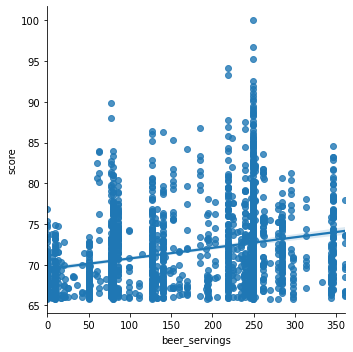

In [12]:
sns.lmplot(x='beer_servings', y='score', data=merge_df)

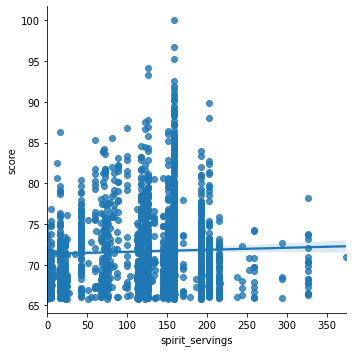

In [13]:
sns.lmplot(x='spirit_servings', y='score', data=merge_df)

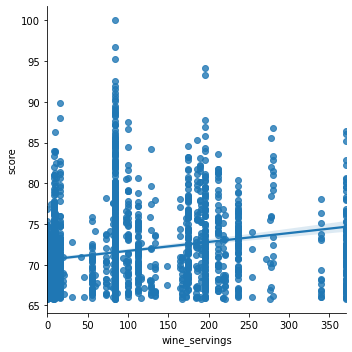

In [14]:
sns.lmplot(x='wine_servings', y='score', data=merge_df)

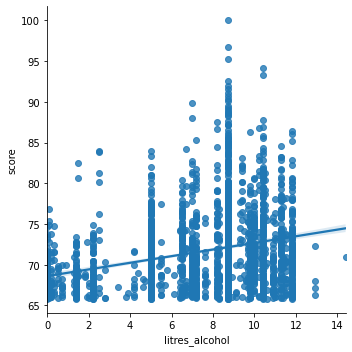

In [15]:
sns.lmplot(x='litres_alcohol', y='score', data=merge_df)

### Relationship between variables
We can see that there is a positive relationship between scores and the other four variables to describe alcohol consumption, beer_servings, spirit_servings, wine_servings, and litres_alcohol

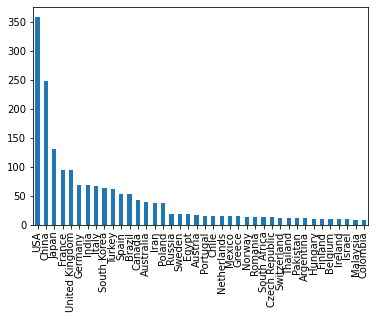

In [16]:
merge_df['location'].value_counts()[:40].plot(kind='bar')

We can also see from the above graph there are many institutions in the USA, China, Japan, France, and the UK. Other countries only have a few institutions, so there are less data to contribute to the reputation of the universities in those countries.

In [17]:
merge_df.describe()

,rank,score,beer_servings,spirit_servings,wine_servings,litres_alcohol
count,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000
mean,998.770930,71.658860,168.241911,129.255265,96.251156,7.485362
std,578.486548,5.093907,99.796775,66.289347,101.118107,3.218063
min,1.000000,65.800000,0.000000,0.000000,0.000000,0.000000
25%,497.000000,67.700000,79.000000,76.000000,8.000000,5.000000
50%,995.000000,70.300000,185.000000,151.000000,84.000000,8.700000
75%,1500.500000,74.200000,249.000000,170.000000,175.000000,10.000000
max,2000.000000,100.000000,361.000000,373.000000,370.000000,14.400000


Based on the described stats of each variable, there do not seem to be any clear outliers or unexpected values.

Linear regression analysis

To see the relationship between the rate of alcohol consumption among citizens within a country and the reputation of that country's universities, we will first find the average college reputation of each country.

In [18]:
merge_df.head()

,rank,institution,location,score,beer_servings,spirit_servings,wine_servings,litres_alcohol
0,1,Harvard University,USA,100.0,249,158,84,8.7
1,2,Massachusetts Institute of Technology,USA,96.7,249,158,84,8.7
2,3,Stanford University,USA,95.2,249,158,84,8.7
3,6,Columbia University,USA,92.6,249,158,84,8.7
4,7,Princeton University,USA,92.0,249,158,84,8.7


In [19]:
avg_score = list(merge_df.groupby(by='location')['score'].mean())
final_df = pd.DataFrame(uni_sort, columns=['location'])
final_df['avg_score'] = avg_score
final_df['beer_servings'] = list(alc_df['beer_servings'])
final_df['spirit_servings'] = list(alc_df['spirit_servings'])
final_df['wine_servings'] = list(alc_df['wine_servings'])
final_df['litres_alcohol'] = list(alc_df['litres_alcohol'])

We calculated the average score of the reputation of the colleges of each country and it is at the avg_score column. We also created a new dataframe called final_df that only contains the information we need to do the analysis.

In [20]:
## Analysis for beer

#get the variable that we are going to use for regression
Y = final_df['beer_servings'].values
X = final_df['avg_score'].values
#There are 94 countries so we are going to use 

train_Y = final_df['beer_servings'].values
train_X = final_df['avg_score'].values
ones = np.ones(94, dtype=np.int16).reshape(94,1)

train_X_A = train_X.reshape(94,1)

A = np.append(ones, train_X_A, 1)

vector = np.linalg.lstsq(A,train_Y, rcond=None)[0]
vector

array([-780.91987958,   13.14016764])

In [21]:
print("beer_servings = w0 + w1 x avg_score")
print("beer_servings = -780.91987958 + 13.14016764 x avg_score")

beer_servings = w0 + w1 x avg_score
beer_servings = -780.91987958 + 13.14016764 x avg_score


Text(0.5, 1.0, 'Prediction of beer serving based on reputation of colleges')

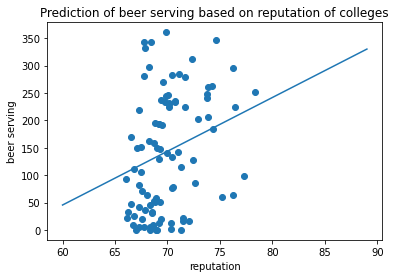

In [22]:
ax = plt.axes()
reputation = 60 + np.arange(30)
predict_consumption = -543.71754552 + 9.8201046*reputation
ax.scatter(X, Y)
ax.plot(reputation, predict_consumption)
ax.set_ylabel('beer serving')
ax.set_xlabel('reputation')
ax.set_title('Prediction of beer serving based on reputation of colleges')

In [23]:
outcome_1, predictors_1 = patsy.dmatrices('beer_servings ~ avg_score', final_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          beer_servings   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     11.13
Date:                Wed, 17 Mar 2021   Prob (F-statistic):            0.00123
Time:                        17:56:07   Log-Likelihood:                -567.48
No. Observations:                  94   AIC:                             1139.
Df Residuals:                      92   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -780.9199    275.741     -2.832      0.0

For the analysis for beer serving, the result seems to be significant because the p value for avg_score is 0.001 which is less than .05 which is the alpha value we set. By looking at the data visualization created, the original data points are plotted as a scatter plot. The model that we trained is presented as a regression line. As we can see from the result, there is a positive relationship between beer consumption and the average reputation of colleges of a country.

In [24]:
## Analysis for spirit

#get the variable that we are going to use for regression
Y = final_df['spirit_servings'].values
X = final_df['avg_score'].values
#There are 94 countries so we are going to use 

train_Y = final_df['spirit_servings'].values
train_X = final_df['avg_score'].values
ones = np.ones(94, dtype=np.int16).reshape(94,1)

train_X_A = train_X.reshape(94,1)

A = np.append(ones, train_X_A, 1)

vector = np.linalg.lstsq(A,train_Y, rcond=None)[0]
vector

array([-365.38253352,    6.53278285])

In [25]:
print("spirit_servings = w0 + w1 x avg_score")
print("spirit_servings = -365.38253352 + 6.53278285 x avg_score")

spirit_servings = w0 + w1 x avg_score
spirit_servings = -365.38253352 + 6.53278285 x avg_score


Text(0.5, 1.0, 'Prediction of spirit servings based on reputation of colleges')

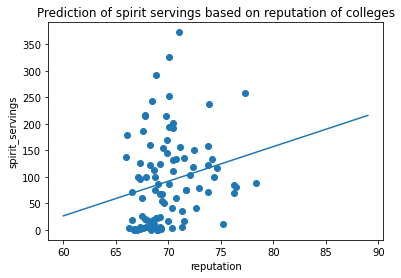

In [26]:
ax = plt.axes()
reputation = 60 + np.arange(30)
x_axis = np.arange(350)
y_axis = np.arange(100)
predict_consumption = -365.38253352 + 6.53278285*reputation
ax.scatter(X, Y)
ax.plot(reputation, predict_consumption)
ax.set_ylabel('spirit_servings')
ax.set_xlabel('reputation')
ax.set_title('Prediction of spirit servings based on reputation of colleges')

In [27]:
outcome_1, predictors_1 = patsy.dmatrices('spirit_servings ~ avg_score', final_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:        spirit_servings   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.262
Date:                Wed, 17 Mar 2021   Prob (F-statistic):             0.0418
Time:                        17:56:08   Log-Likelihood:                -546.90
No. Observations:                  94   AIC:                             1098.
Df Residuals:                      92   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -365.3825    221.524     -1.649      0.1

For the analysis for spirit serving, the result seems to be significant because the p value for avg_score is 0.042 which is less than .05 which is the alpha value we set. By looking at the data visualization created, the original data points are plotted as a scatter plot. The model that we trained is presented as a regression line. As we can see from the result, there is a positive relationship between spirit consumption and the average reputation of colleges of a country.

In [28]:
## Analysis for wine

#get the variable that we are going to use for regression
Y = final_df['wine_servings'].values
X = final_df['avg_score'].values
#There are 94 countries so we are going to use 

train_Y = final_df['wine_servings'].values
train_X = final_df['avg_score'].values
ones = np.ones(94, dtype=np.int16).reshape(94,1)

train_X_A = train_X.reshape(94,1)

A = np.append(ones, train_X_A, 1)

vector = np.linalg.lstsq(A,train_Y, rcond=None)[0]
vector

array([-839.89562489,   13.14407908])

In [29]:
print("wine_servings = w0 + w1 x avg_score")
print("wine_servings = -839.89562489 + 13.14407908 x avg_score")

wine_servings = w0 + w1 x avg_score
wine_servings = -839.89562489 + 13.14407908 x avg_score


Text(0.5, 1.0, 'Prediction of wine_servings based on reputation of colleges')

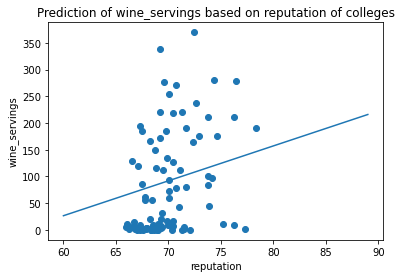

In [30]:
ax = plt.axes()
reputation = 60 + np.arange(30)
x_axis = np.arange(350)
y_axis = np.arange(100)
predict_consumption = -365.38253352 + 6.53278285*reputation
ax.scatter(X, Y)
ax.plot(reputation, predict_consumption)
ax.set_ylabel('wine_servings')
ax.set_xlabel('reputation')
ax.set_title('Prediction of wine_servings based on reputation of colleges')

In [31]:
outcome_1, predictors_1 = patsy.dmatrices('wine_servings ~ avg_score', final_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          wine_servings   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     14.64
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           0.000237
Time:                        17:56:08   Log-Likelihood:                -554.62
No. Observations:                  94   AIC:                             1113.
Df Residuals:                      92   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -839.8956    240.495     -3.492      0.0

For the analysis for wine serving, the result seems to be significant because the p value for avg_score is 0.0 (less than 0.0005) which is less than .05 which is the alpha value we set. By looking at the data visualization created, the original data points are plotted as a scatter plot. The model that we trained is presented as a regression line. As we can see from the result, there is a positive relationship between wine consumption and the average reputation of colleges of a country.

In [32]:
## Analysis for litres_alcohol

#get the variable that we are going to use for regression
Y = final_df['litres_alcohol'].values
X = final_df['avg_score'].values
#There are 94 countries so we are going to use 

train_Y = final_df['litres_alcohol'].values
train_X = final_df['avg_score'].values
ones = np.ones(94, dtype=np.int16).reshape(94,1)

train_X_A = train_X.reshape(94,1)

A = np.append(ones, train_X_A, 1)

vector = np.linalg.lstsq(A,train_Y, rcond=None)[0]
vector

array([-29.71937967,   0.51233688])

In [33]:
print("litres_alcohol = w0 + w1 x avg_score")
print("litres_alcohol = -29.71937967 + 0.51233688 x avg_score")

litres_alcohol = w0 + w1 x avg_score
litres_alcohol = -29.71937967 + 0.51233688 x avg_score


Text(0.5, 1.0, 'Prediction of litres_alcohol based on reputation of colleges')

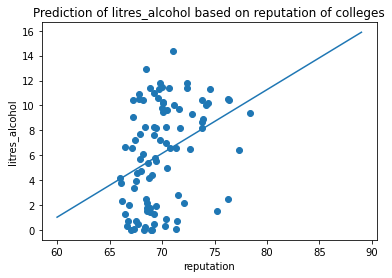

In [34]:
ax = plt.axes()
reputation = 60 + np.arange(30)
predict_consumption = -29.71937967 + 0.51233688*reputation
ax.scatter(X, Y)
ax.plot(reputation, predict_consumption)
ax.set_ylabel('litres_alcohol')
ax.set_xlabel('reputation')
ax.set_title('Prediction of litres_alcohol based on reputation of colleges')

In [35]:
outcome_1, predictors_1 = patsy.dmatrices('litres_alcohol ~ avg_score', final_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         litres_alcohol   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     11.98
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           0.000817
Time:                        17:56:08   Log-Likelihood:                -259.03
No. Observations:                  94   AIC:                             522.1
Df Residuals:                      92   BIC:                             527.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.7194     10.362     -2.868      0.0

For the analysis for litres alcohol, the result seems to be significant because the p value for avg_score is 0.001 which is less than .05 which is the alpha value we set. By looking at the data visualization created, the original data points are plotted as a scatter plot. The model that we trained is presented as a regression line. As we can see from the result, there is a positive relationship between alcohol consumption in terms of liters and the average reputation of colleges of a country.

By looking at the linear regression for beer_servings, spirit_servings, wine_servings, and litres_alcohol, all of them show a positive relationship between alcohol consumption and the average reputation of colleges of a country. This means that in countries with more reputable colleges on average, the people of that country are more likely to consume alcoholic beverages. This rejected our hypothesis: higher education quality of a country should be negatively correlated with alcohol consumption. The analysis result shows that the higher education quality of a country should be directly proportional to alcohol consumption.

# Ethics & Privacy

On privacy concerns, data must be collected under the consent of the interviewee or institution. During the process of the analysis, the identity of the interviewee should not be included or made anonymously. No other personal information should be used other than the data that are required for the research. On ethics concerns, the analysis should be objective. The data should be unbiased. The process of analysis should be made available to others for transparency. After finishing the research, monitoring the most updated information is required to modify our research in the future.

# Conclusion & Discussion

Through the course of our project, we sought to find out how the rate of alcohol consumption correlates to the quality of university education throughout the world. Here in the US, drinking in college is prevalent among all kinds of students, especially those below the legal drinking age. College drinking culture has been normalized in the US for many years, so we were interested in investigating how the US compares to other countries in quality of education when factoring in average alcohol consumption among its students. Our background research initially led us to believe that alcohol consumption would not have a positive correlation with university rank, even on the global scale. Based on this prior research, we hypothesized that a country’s higher education quality would be indirectly proportional to alcohol consumption. To carry out data analysis, we used two separate datasets. One of the datasets deals with ranking the top 2000 universities in the world and the other dataset deals with representing average alcohol consumption rates of an extensive variety of countries. Using linear regression analysis on our data, we found that there is a notable positive correlation between university reputation and alcoholic beverage consumption. Thus, our findings contradicted our hypothesis, and we now conclude that the alcohol consumption of a country’s citizens is directly proportional to the quality of higher education in said country.

The limitations of our project that stood out to us mainly stem from limitations found in the datasets we picked out. First of all, the average alcohol consumption data were collected in 2010, whereas the university ranking data corresponds to the 2019-2020 school year. Alcohol consumption rates have likely changed for many countries in that time span of around 10 years. Secondly, the college dataset is majoritively occupied by US schools, so this dataset is not a perfect representation of the question we initially pursued. In an ideal world, universities would be more equally distributed throughout the globe and our dataset would contain more data representing other countries of the world. Limitations aside, it is important to acknowledge that our group came to the conclusion that there is a positive correlation between alcohol consumption and the quality of education within a country. This leaves us with the question: what societal factors are causing this positive correlation? We think it is possible that alcoholic consumption rates tend to increase at universities with relatively difficult coursework because students try to cope with drinking. It is also quite possible that this positive correlation has to do with the fact that prospective university students might seek out universities that seem to have a lively partying/drinking scene. These universities still compete quite competitively on the global scale, so we have to assume that the noteworthy quality of education at these institutions is ultimately caused by the tuition spent by its students and how the institutions responsibly manage these funds.